# Models training 
This notebook is used to train test and save models that are defined in the `autoencoders.py` file. 

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
%load_ext autoreload
%autoreload 2
plt.style.use('ggplot')
import sys 
import os
sys.path.append('/'.join(os.getcwd().split('/')[:4]))
from config.get import cfg
from tensorflow import keras
from tensorflow.keras import layers
import autoencoders

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Loading data

In [22]:
X_train = np.load(cfg['files']["raw_train_features_liquid"])
X_test  = np.load(cfg['files']["raw_test_features_liquid"])
print(f"shapes : X_train={X_train.shape},X_test={X_test.shape}")

shapes : X_train=(5292, 3, 600, 2),X_test=(1323, 3, 600, 2)


# Loading model
Loading a model defined in `autoencoders.py`

In [37]:
model_name,autoencoder = autoencoders.CNN_fully_connected()
autoencoder.summary()
train_loss = []
test_loss = []

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 3, 600, 2)]       0         
                                                                 
 conv2d (Conv2D)             (None, 3, 600, 8)         152       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 300, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 300, 4)         292       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 300, 4)        0         
 2D)                                                             
                                                                 
 dense_18 (Dense)            (None, 1, 300, 300)       1500

# Training the model

In [38]:
hist = autoencoder.fit(X_train, X_train,epochs=150,validation_data=(X_test, X_test))

# save losses
train_loss += hist.history["loss"]
test_loss  += hist.history["val_loss"]

Epoch 1/150
166/166 [==============================] - 83s 496ms/step - loss: 0.4387 - val_loss: 0.3221
Epoch 2/150
166/166 [==============================] - 81s 486ms/step - loss: 0.2899 - val_loss: 0.2814
Epoch 3/150
166/166 [==============================] - 82s 495ms/step - loss: 0.2681 - val_loss: 0.2681
Epoch 4/150
166/166 [==============================] - 81s 485ms/step - loss: 0.2568 - val_loss: 0.2582
Epoch 5/150
166/166 [==============================] - 82s 492ms/step - loss: 0.2479 - val_loss: 0.2503
Epoch 6/150
166/166 [==============================] - 82s 492ms/step - loss: 0.2412 - val_loss: 0.2447
Epoch 7/150
166/166 [==============================] - 82s 494ms/step - loss: 0.2360 - val_loss: 0.2396
Epoch 8/150
166/166 [==============================] - 81s 487ms/step - loss: 0.2325 - val_loss: 0.2358
Epoch 9/150
166/166 [==============================] - 82s 493ms/step - loss: 0.2295 - val_loss: 0.2332
Epoch 10/150
166/166 [==============================] - 83s 498m

166/166 [==============================] - 81s 492ms/step - loss: 0.1895 - val_loss: 0.1973
Epoch 80/150
166/166 [==============================] - 83s 498ms/step - loss: 0.1892 - val_loss: 0.1965
Epoch 81/150
166/166 [==============================] - 82s 494ms/step - loss: 0.1892 - val_loss: 0.1990
Epoch 82/150
166/166 [==============================] - 82s 492ms/step - loss: 0.1890 - val_loss: 0.1970
Epoch 83/150
166/166 [==============================] - 82s 496ms/step - loss: 0.1890 - val_loss: 0.1972
Epoch 84/150
166/166 [==============================] - 82s 492ms/step - loss: 0.1892 - val_loss: 0.1959
Epoch 85/150
166/166 [==============================] - 82s 493ms/step - loss: 0.1889 - val_loss: 0.1968
Epoch 86/150
166/166 [==============================] - 81s 490ms/step - loss: 0.1887 - val_loss: 0.1972
Epoch 87/150
166/166 [==============================] - 82s 492ms/step - loss: 0.1885 - val_loss: 0.1968
Epoch 88/150
166/166 [==============================] - 82s 492ms/st

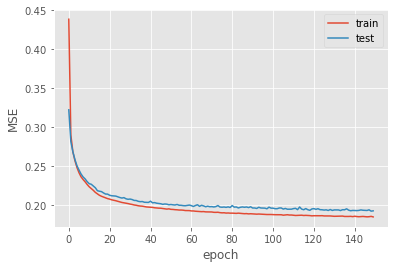

In [39]:
plt.plot(train_loss,label="train")
plt.plot(test_loss,label="test")
plt.xlabel("epoch")
plt.ylabel("MSE")
plt.legend()
plt.show()

# Saving 
We save the trained model and the recorded losses

In [40]:
autoencoder.save(cfg["models"]["autoencoder"] + f"{model_name}")
np.save(file = cfg["models"]["autoencoder"]+ f"{model_name}_train_loss", arr = np.array(train_loss))
np.save(file = cfg["models"]["autoencoder"]+ f"{model_name}_test_loss", arr = np.array(test_loss))